In [1]:
## Utilities

import numpy as np
import random
import math
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import f1_score
from sklearn import svm

#### MNIST Dataset

In [2]:
## Import the data
mnist = fetch_openml('mnist_784')

mnist.target.shape

c:\Documents\Sussex_Files\Semester_1\Artificial_Life\Final_Project\Codes\ALifeProject\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000,)

In [3]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

#### Dividing the dataset into training data and test data

In [4]:
## np.random.permutation create an array of random numbers in the range 0 to 5000
index_number= np.random.permutation(5000)
## Use the index_numer variable to select the random positions in the dataset
x1, y1 = mnist.data.loc[index_number], mnist.target.loc[index_number]
## Reset the index, now the index are from 0 to 5000
x1.reset_index(drop = True,inplace = True)
y1.reset_index(drop = True,inplace = True)
## Assing some the first 5000 values to x and y train and the rest to x and y test
x_train , x_test = x1[:4000], x1[4000:]
y_train , y_test = y1[:4000], y1[4000:]

In [5]:
print("printing the count of infinity values") 

count = np.isinf(x_train).values.sum() 
print("x_train contains " + str(count) + " infinite values") 

count2 = np.isinf(x_test).values.sum() 
print("x_test contains " + str(count2) + " infinite values") 

count3 = x_train.isnull().sum().sum()
print('Number of NaN values present in x_train: ' + str(count3))

count4 = x_test.isnull().sum().sum()
print('Number of NaN values present in x_test: ' + str(count4))

count5 = y_train.isnull().sum().sum()
print('Number of NaN values present in y_train: ' + str(count5))

count6 = y_train.isnull().sum().sum()
print('Number of NaN values present in y_test: ' + str(count6))

printing the count of infinity values
x_train contains 0 infinite values
x_test contains 0 infinite values
Number of NaN values present in x_train: 0
Number of NaN values present in x_test: 0
Number of NaN values present in y_train: 0
Number of NaN values present in y_test: 0


### Create the population

In this case as the `kernel` and `gamma` are encoded so is possible to change the parameters.

In [6]:
## Create population - Possible solution

## Precomputed not use because needs an square matrix to work and it is not given in this experiment
## Hyperparameter selected for tuning and optimization
# kernel = ['linear', 'poly', 'rbf', 'sigmoid']
kernel = [1, 2, 3, 4]
C = np.arange(0.5, 15, 0.5)
degree = np.arange(1, 10, 1)
# gamma = ['scale', 'auto']
gamma = [1, 2]
coef0 = np.arange(0, 1, 0.05)
pop_size = 5
random.seed(1997)

### Utilities

In [7]:
def create_random_hyperparameters_set(my_kernel, my_C, my_degree, my_gamma, my_coef0, p_size):
    """
        Create random hyperparameters set. Uses the pre defined hyperparameters to create randomly the first genotype
        :param kernel: List with the possible kernels
        :param C: possible C values
        :param degree: possible degree values
        :param gamma: list with the gamma possibilities. 'scalar' or 'auto'
        :param coef0: possible coef0 values

        :return: list with random values for the SVM algorithm
    """
    population = []
    ## Create the output list
    for i in range(p_size):
        hyper_params = [random.choice(my_kernel), random.choice(my_C), random.choice(my_degree), random.choice(my_gamma), round(random.choice(my_coef0), 2)]
        population.append(hyper_params)

    return population

def get_svm_fitness_GA(genotype):
    """
        Creates the SVM model, train and test the model to get the fitness
        :param genotype: List with the hyperpameters - Kernel, C, degree, gamma and coef0
        :return: SVC F1 Score
    """
    ## Re-build the hyperparams
    ## Assign the kernel
    # print(type(genotype[0]))
    temp_geno = list(genotype.copy())
    if temp_geno[0] == 1:
        temp_geno[0] = 'linear'

    elif temp_geno[0] == 2:
        # print("type temp_geno: ", type(temp_geno))
        temp_geno[0] = 'poly'

    elif temp_geno[0] == 3:
        temp_geno[0] = 'rbf'

    elif temp_geno[0] == 4:
        temp_geno[0] = 'sigmoid'

    ## Assign the gamma
    if temp_geno[3] == 1:
        temp_geno[3] = 'scale'

    elif temp_geno[3] == 2:
        temp_geno[3] = 'auto'

    my_svc = svm.SVC(kernel=temp_geno[0], C=temp_geno[1], degree=int(temp_geno[2]), gamma=temp_geno[3], coef0=temp_geno[4])
    my_svc.fit(x_train,y_train)
    my_result=my_svc.predict(x_test)
    my_f1_score = f1_score(y_test, my_result, average='micro')
    if math.isinf(my_f1_score):
        my_f1_score = 0.99999999
        return my_f1_score
    # print('Accuracy :',accuracy_score(y_test,my_result))
    # print(classification_report(y_test,result))
    # print(f'F1 Score: {my_f1_score}')
    return my_f1_score

def get_population_fitness(population):
    """
        Calculates the fitness for each solution
        :param population: List that contains the possible solutions randomly generated
        :return: The fitness (F1 score) for each solution
    """
    pop_fitness = []
    for solution in population:
        ## Fitness is the F1 score of the solution
        # print(f"solution: {solution}")
        solution_fitness = round(get_svm_fitness_GA(solution), 2)
        pop_fitness.append(solution_fitness)
    return pop_fitness

### Test - Create initial hyperparameters - Initial population

In [8]:
# pop_test = create_random_hyperparameters_set(my_kernel=kernel, my_C=C, my_degree=degree, my_gamma=gamma, my_coef0=coef0, p_size=pop_size)
# type(pop_test)

### Test initial hyperparameters - Initial population fitness

In [9]:
# geno = [3, 5.5, 1, 1, 0.35]
# pop_fitness_test = get_svm_fitness_GA(geno)
# pop_fitness_test

0 [2, 1.5, 4, 1, 0.35]
1 [4, 12.5, 6, 2, 0.35]
2 [2, 14.0, 1, 2, 0.45]
3 [2, 1.0, 7, 1, 0.35]
4 [3, 5.5, 5, 1, 0.95]
5 [1, 13.5, 4, 2, 0.3]
6 [2, 14.0, 4, 1, 0.8]
7 [3, 5.5, 2, 2, 0.35]
8 [1, 3.5, 3, 1, 0.0]
9 [4, 14.0, 1, 2, 0.0]
10 [4, 11.0, 6, 2, 0.9]
11 [4, 13.0, 1, 2, 0.6]
12 [2, 3.0, 4, 2, 0.65]


0 0.95
1 0.11
2 0.92
3 0.92
4 0.96
5 0.92
6 0.96
7 0.11
8 0.92
9 0.11
10 0.11
11 0.11
12 0.93
Generation: 0
new_pop_best_fitness:  0.96
Best current solution:  [3, 5.5, 5, 1, 0.95]
-------------------------------------------
Generation: 1
new_pop_best_fitness:  0.96
Best current solution:  [3, 5.5, 5, 1, 0.95]
-------------------------------------------
Generation: 2
new_pop_best_fitness:  0.96
Best current solution:  [3, 5.5, 5, 1, 0.95]
-------------------------------------------
Generation: 3
new_pop_best_fitness:  0.96
Best current solution:  [3, 5.5, 5, 1, 0.95]
-------------------------------------------
Generation: 4
new_pop_best_fitness:  0.96
Best current solution:  [3, 5.5, 5, 1, 0.95]
-------------------------------------------
Generation: 5
new_pop_best_fitness:  0.96
Best current solution:  [3, 5.5, 5, 1, 0.95]
-------------------------------------------
Generation: 6
new_pop_best_fitness:  0.96
Best current solution:  [3, 5.5, 5, 1, 0.95]
---------------------------------

Text(0.5, 1.0, 'Microbial GA')

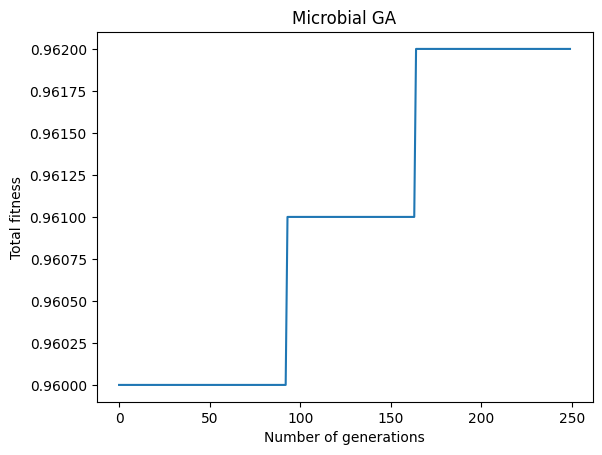

In [10]:
# setup variables
pop_size = 13                    ## Possible solutions
n_genes = 5                     ## SVM hyperparameters
n_generations = 250
kernel_mutation_prob = 0.05
CROSSOVER_MUTATION = True
total_fitness = []

## Initial population
population_hyper_params = create_random_hyperparameters_set(my_kernel=kernel, my_C=C, my_degree=degree, my_gamma=gamma, my_coef0=coef0, p_size=pop_size)
for i, j in enumerate(population_hyper_params):
    print(i, j)

## Calculating the fitness for the initial population
## Get the initial population fitness
population_fitness = get_population_fitness(population_hyper_params)
for i, j in enumerate(population_fitness):
    print(i, j)

for gen in range(n_generations):

    ##Get a random individual, here get the index to then look for the fitness of that individual
    rand_p1 = np.random.choice(range(5))
    rand_p2 = np.random.choice(range(5))

    ##Check that we are not using the same individual
    if rand_p1 == rand_p2:
        while rand_p1 == rand_p2:
            rand_p1 = np.random.choice(range(5))
            rand_p2 = np.random.choice(range(5))

    ##Get the fitness for the two random individuals
    p1 = population_fitness[rand_p1]
    p2 = population_fitness[rand_p2]

    ##Tournament selection
    if (p1 > p2):
        ##This is the winner index in fitness vector
        winner = rand_p1
        loser = rand_p2
    else:
        winner = rand_p2
        loser = rand_p1

    ##Microbial GA
    #Crossover probability
    pc = 0.1
    #Mutation probability
    pm = 0.1

    ## Mutation and Crossover - Microbial GA
    for i in range(n_genes):
        if CROSSOVER_MUTATION:
            ##Crossover
            if (random.random() < pc):
                ##Replace the loser genes to the winner genes
                population_hyper_params[loser][i] = population_hyper_params[winner][i]
            ##Mutation
            elif (random.random() < pm):
                ## Implement mutation
                    if i == 0 and np.random.rand() < kernel_mutation_prob:
                        population_hyper_params[loser][i] = random.choice(kernel)
                    elif i == 1:
                        population_hyper_params[loser][i] = random.choice(C)
                    elif i == 2:
                        population_hyper_params[loser][i] = random.choice(degree)
                    elif i == 3 and np.random.rand() < kernel_mutation_prob:
                        population_hyper_params[loser][i] = random.choice(gamma)
                    elif i == 4:
                        population_hyper_params[loser][i] = random.choice(coef0)
        else:
            ##Mutation - To test the algorithm just with mutation
            if (random.random() < pm): 
                ## Implement mutation
                    if i == 0 and np.random.rand() < kernel_mutation_prob:
                        population_hyper_params[loser][i] = random.choice(kernel)
                    elif i == 1:
                        population_hyper_params[loser][i] = random.choice(C)
                    elif i == 2:
                        population_hyper_params[loser][i] = random.choice(degree)
                    elif i == 3 and np.random.rand() < kernel_mutation_prob:
                        population_hyper_params[loser][i] = random.choice(gamma)
                    elif i == 4:
                        population_hyper_params[loser][i] = random.choice(coef0)

    ## Update loser fitness in population - calculate the fitness of the loser
    population_fitness[loser] = 0
    population_fitness[loser] = get_svm_fitness_GA(population_hyper_params[loser])

    ## My optimal actual fitness
    optimal = max(population_fitness)

    ## Store the fitness through generations and compare with diferent probabilities to crossover and mutation(pc and pm)
    total_fitness.append(optimal)

    print(f"Generation: {gen}")
    print("new_pop_best_fitness: ", optimal)
    new_pop_best_fitness_pos = np.where(population_fitness == optimal)[0][0]
    new_pop_best_params = population_hyper_params[new_pop_best_fitness_pos]
    print("Best current solution: ", new_pop_best_params)
    print("-------------------------------------------")
    # fitness_over_time.append(new_pop_best_fitness.copy())

plt.plot(total_fitness)
plt.xlabel("Number of generations")
plt.ylabel("Total fitness")
plt.title("Microbial GA")